In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')

In [ ]:
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               77 non-null     object 
 1   Genre              77 non-null     object 
 2   Lead Studio        77 non-null     object 
 3   Audience score %   77 non-null     int64  
 4   Profitability      77 non-null     float64
 5   Rotten Tomatoes %  77 non-null     int64  
 6   Worldwide Gross    77 non-null     object 
 7   Year               77 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 4.9+ KB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
movies.shape

(77, 8)

In [ ]:
ratings.shape

(100836, 4)

In [ ]:
movies.describe()

,Audience score %,Profitability,Rotten Tomatoes %,Year
count,77.000000,77.000000,77.000000,77.000000
mean,63.727273,4.599483,46.701299,2009.077922
std,13.657113,8.031990,26.095001,1.354974
min,35.000000,0.000000,3.000000,2007.000000
25%,52.000000,1.751351,26.000000,2008.000000
50%,64.000000,2.642353,45.000000,2009.000000
75%,76.000000,5.103117,64.000000,2010.000000
max,89.000000,66.934000,96.000000,2011.000000


In [ ]:
movies.describe()

,Audience score %,Profitability,Rotten Tomatoes %,Year
count,77.000000,77.000000,77.000000,77.000000
mean,63.727273,4.599483,46.701299,2009.077922
std,13.657113,8.031990,26.095001,1.354974
min,35.000000,0.000000,3.000000,2007.000000
25%,52.000000,1.751351,26.000000,2008.000000
50%,64.000000,2.642353,45.000000,2009.000000
75%,76.000000,5.103117,64.000000,2010.000000
max,89.000000,66.934000,96.000000,2011.000000


In [ ]:
genres=[]
for genres in movies.Genre:
    x=genres.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in movies.Film:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)

In [ ]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(movie_title)

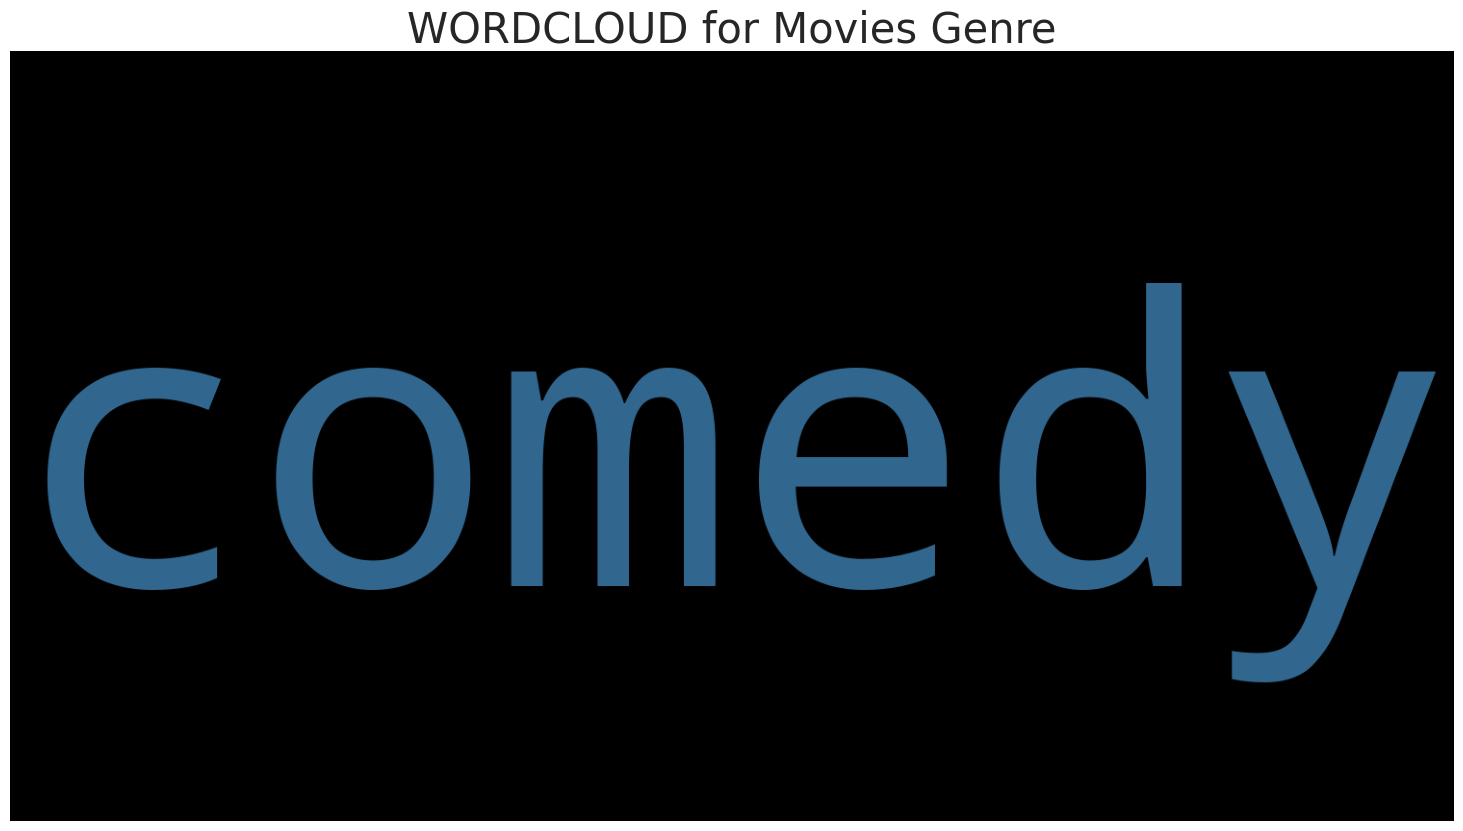

In [ ]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

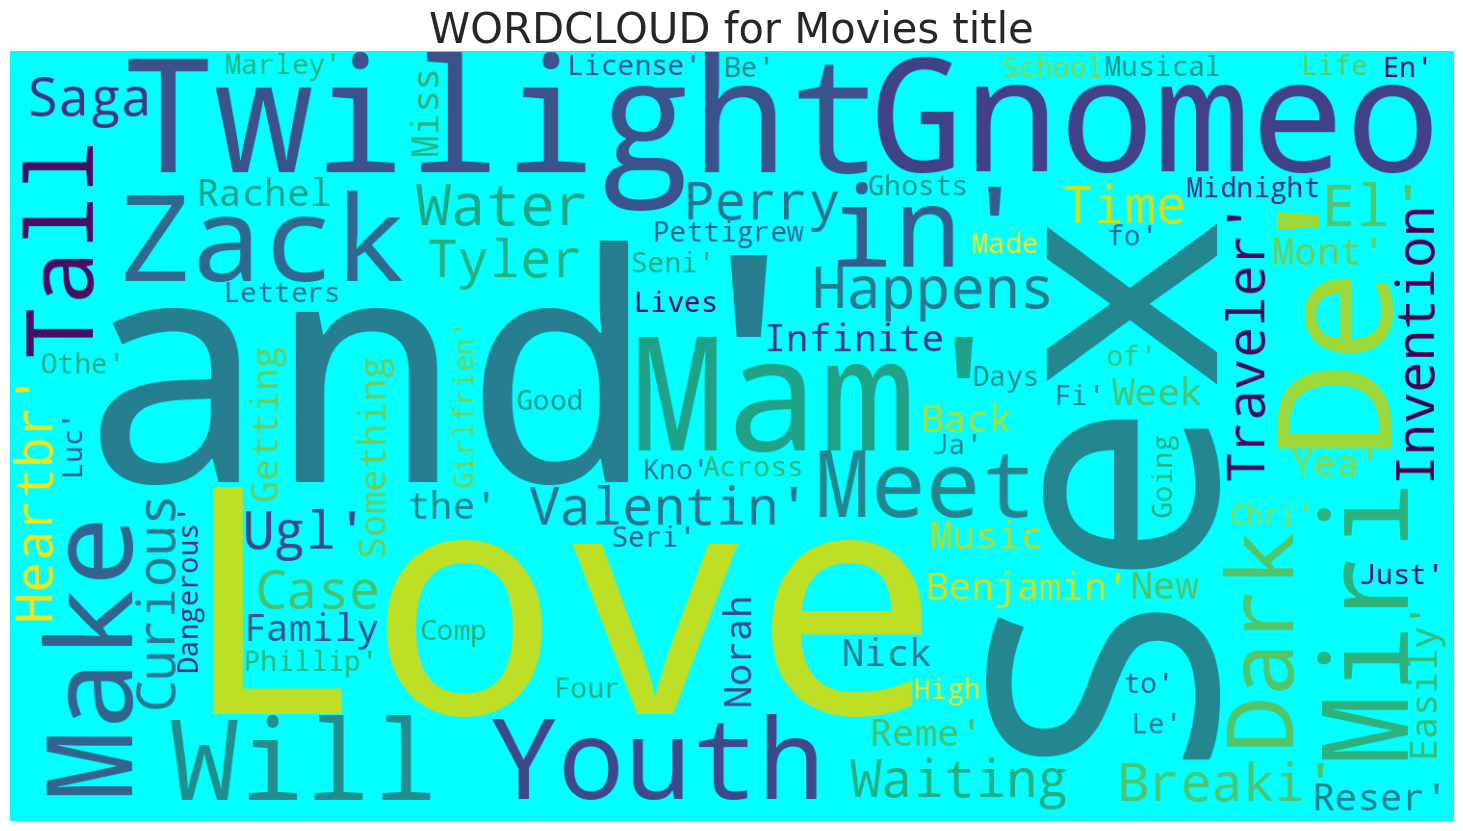

In [ ]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=30)
plt.imshow(wordcloud_title)

In [ ]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

KeyError: ignored

In [ ]:
id=ratings['movieId']
movies=movies.assign(movieId=id)

In [ ]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,1,1,4.0,964982703,Zack and Miri Make a Porno,Romance,The Weinstein Company,70.0,1.747542,64.0,$41.94,2008.0
1,1,3,4.0,964981247,Youth in Revolt,Comedy,The Weinstein Company,52.0,1.090000,68.0,$19.62,2010.0
2,1,6,4.0,964982224,You Will Meet a Tall Dark Stranger,Comedy,Independent,35.0,1.211818,43.0,$26.66,2010.0
3,1,47,5.0,964983815,When in Rome,Comedy,Disney,44.0,0.000000,15.0,$43.04,2010.0
4,1,50,5.0,964982931,What Happens in Vegas,Comedy,Fox,72.0,6.267647,28.0,$219.37,2008.0


In [ ]:
df1=df.groupby(['Film'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()

,rating
Film,
The Curious Case of Benjamin Button,1370.0
The Proposal,1288.5
One Day,1161.0
The Time Traveler's Wife,1062.0
Waitress,955.5


<BarContainer object of 20 artists>

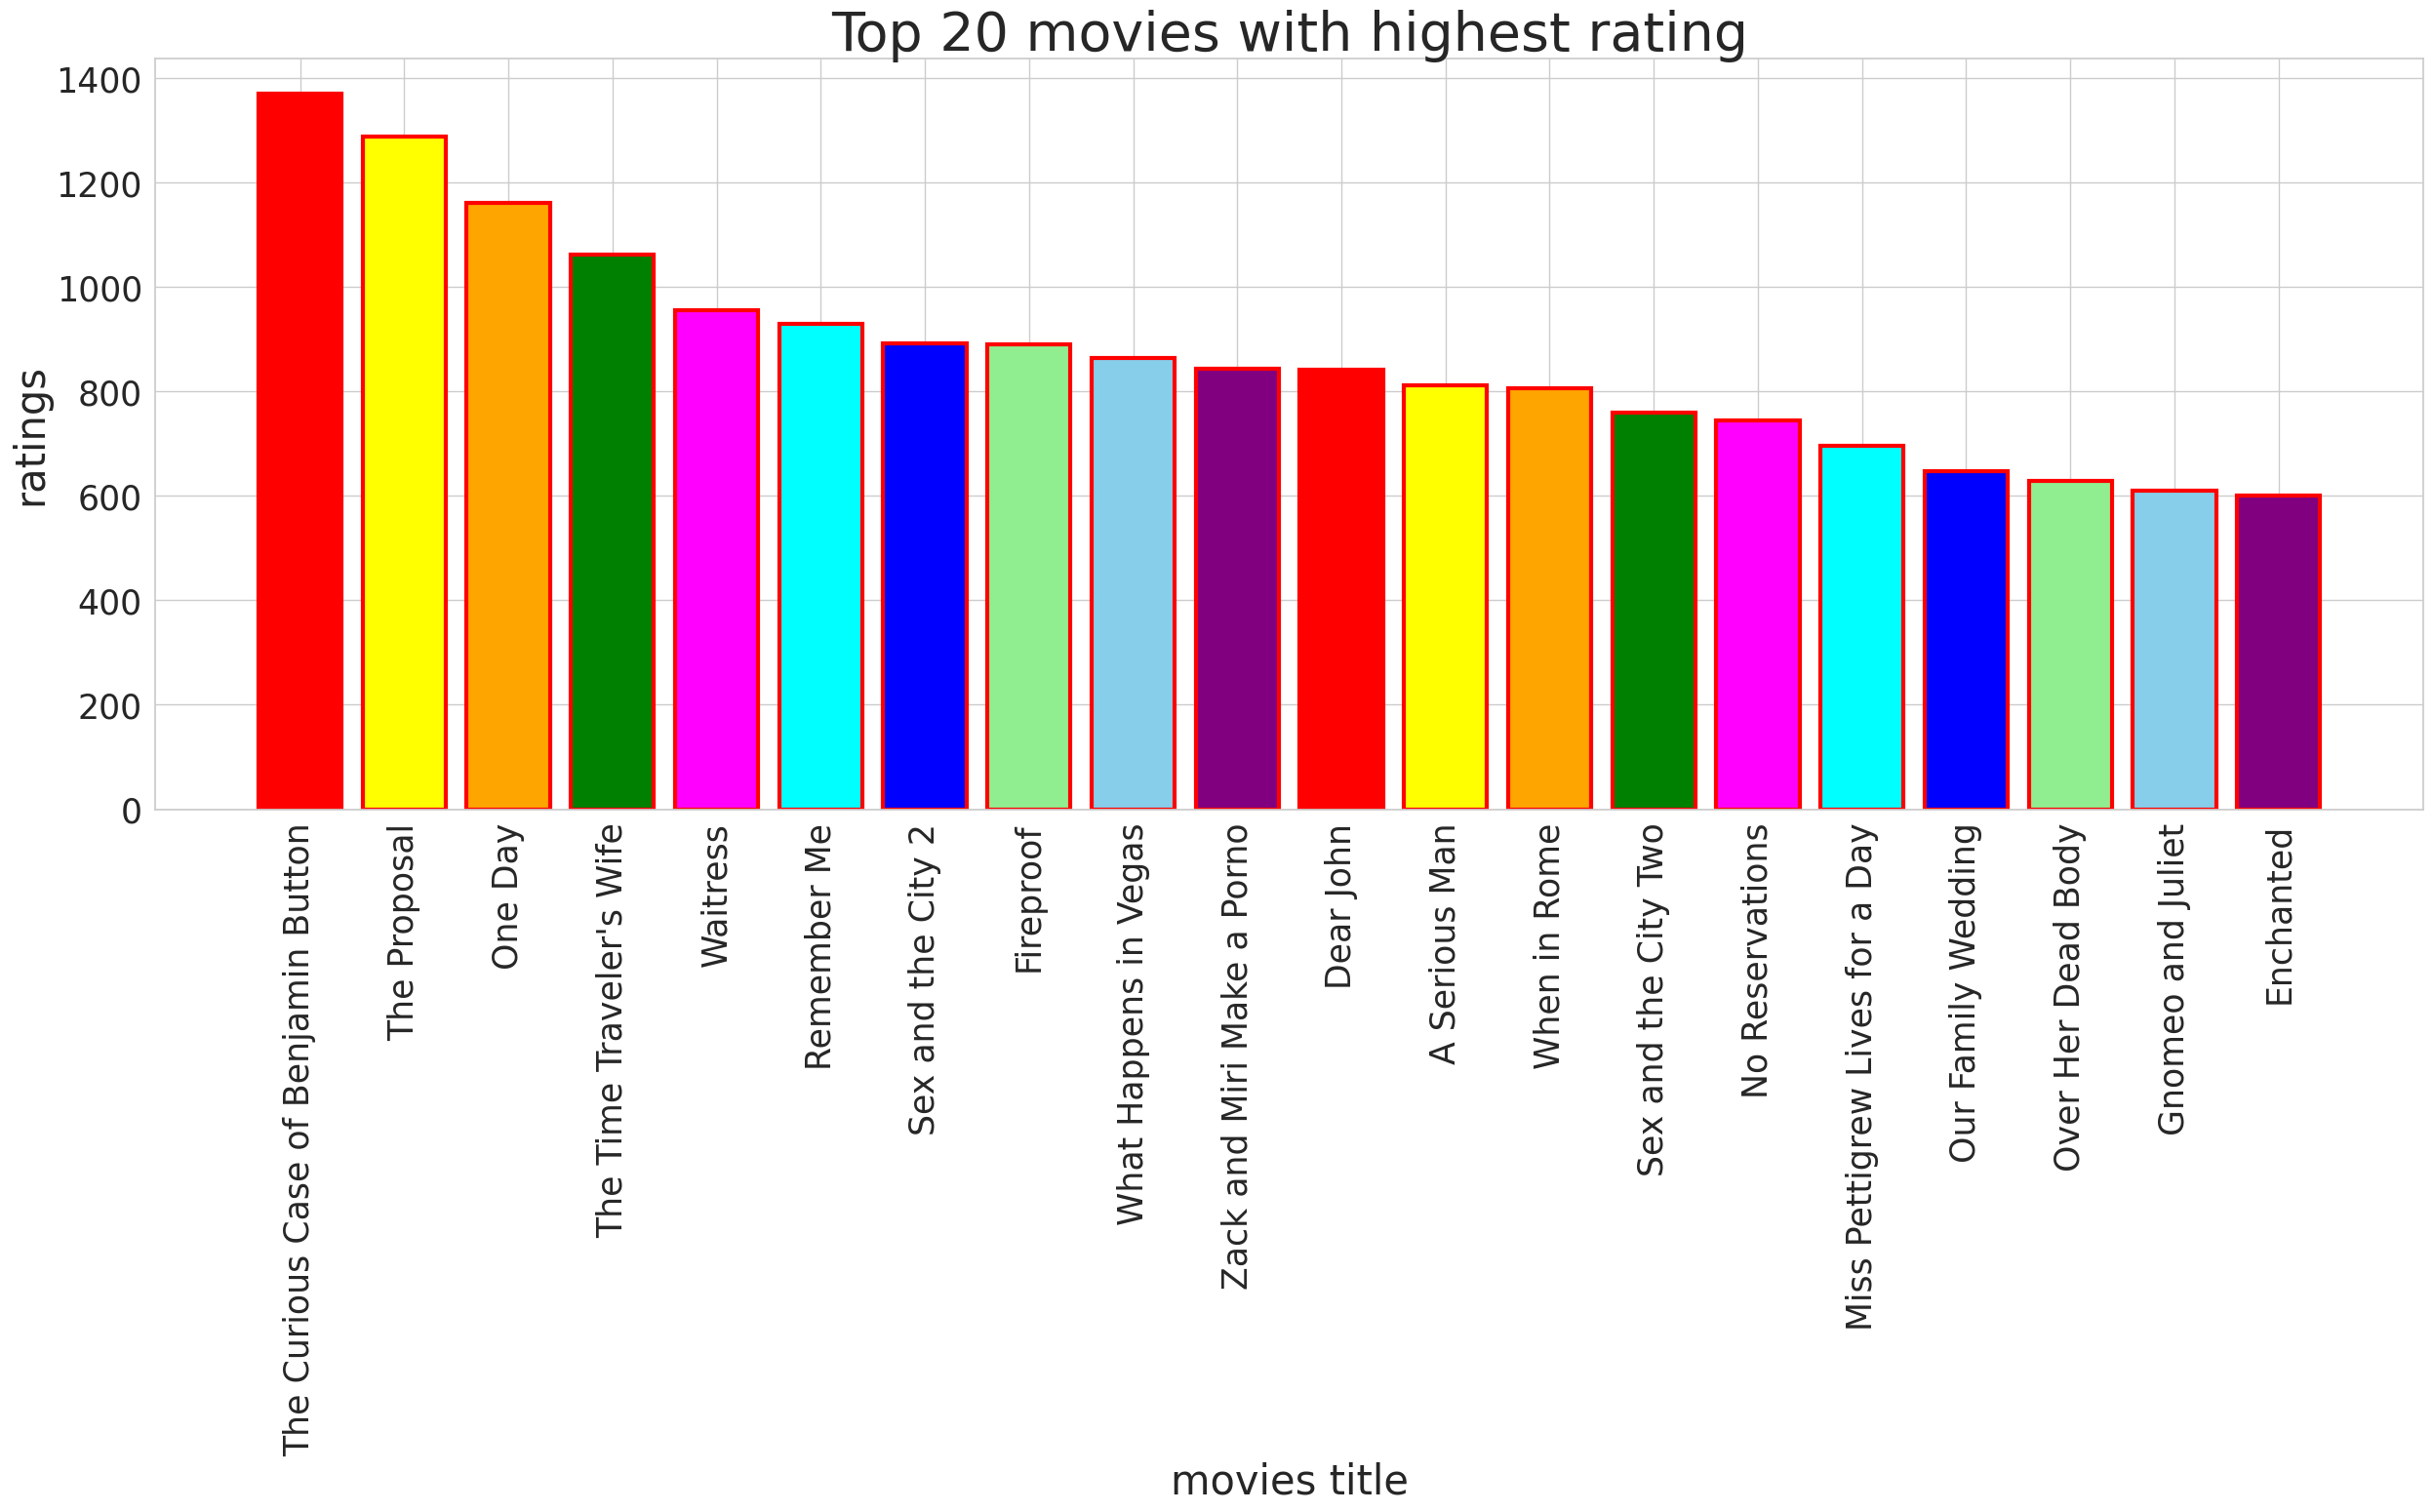

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='red',color=colors)

In [ ]:
df2=df.groupby('Film')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
Film,
The Curious Case of Benjamin Button,329
The Proposal,307
One Day,279
The Time Traveler's Wife,251
Sex and the City 2,238


<BarContainer object of 20 artists>

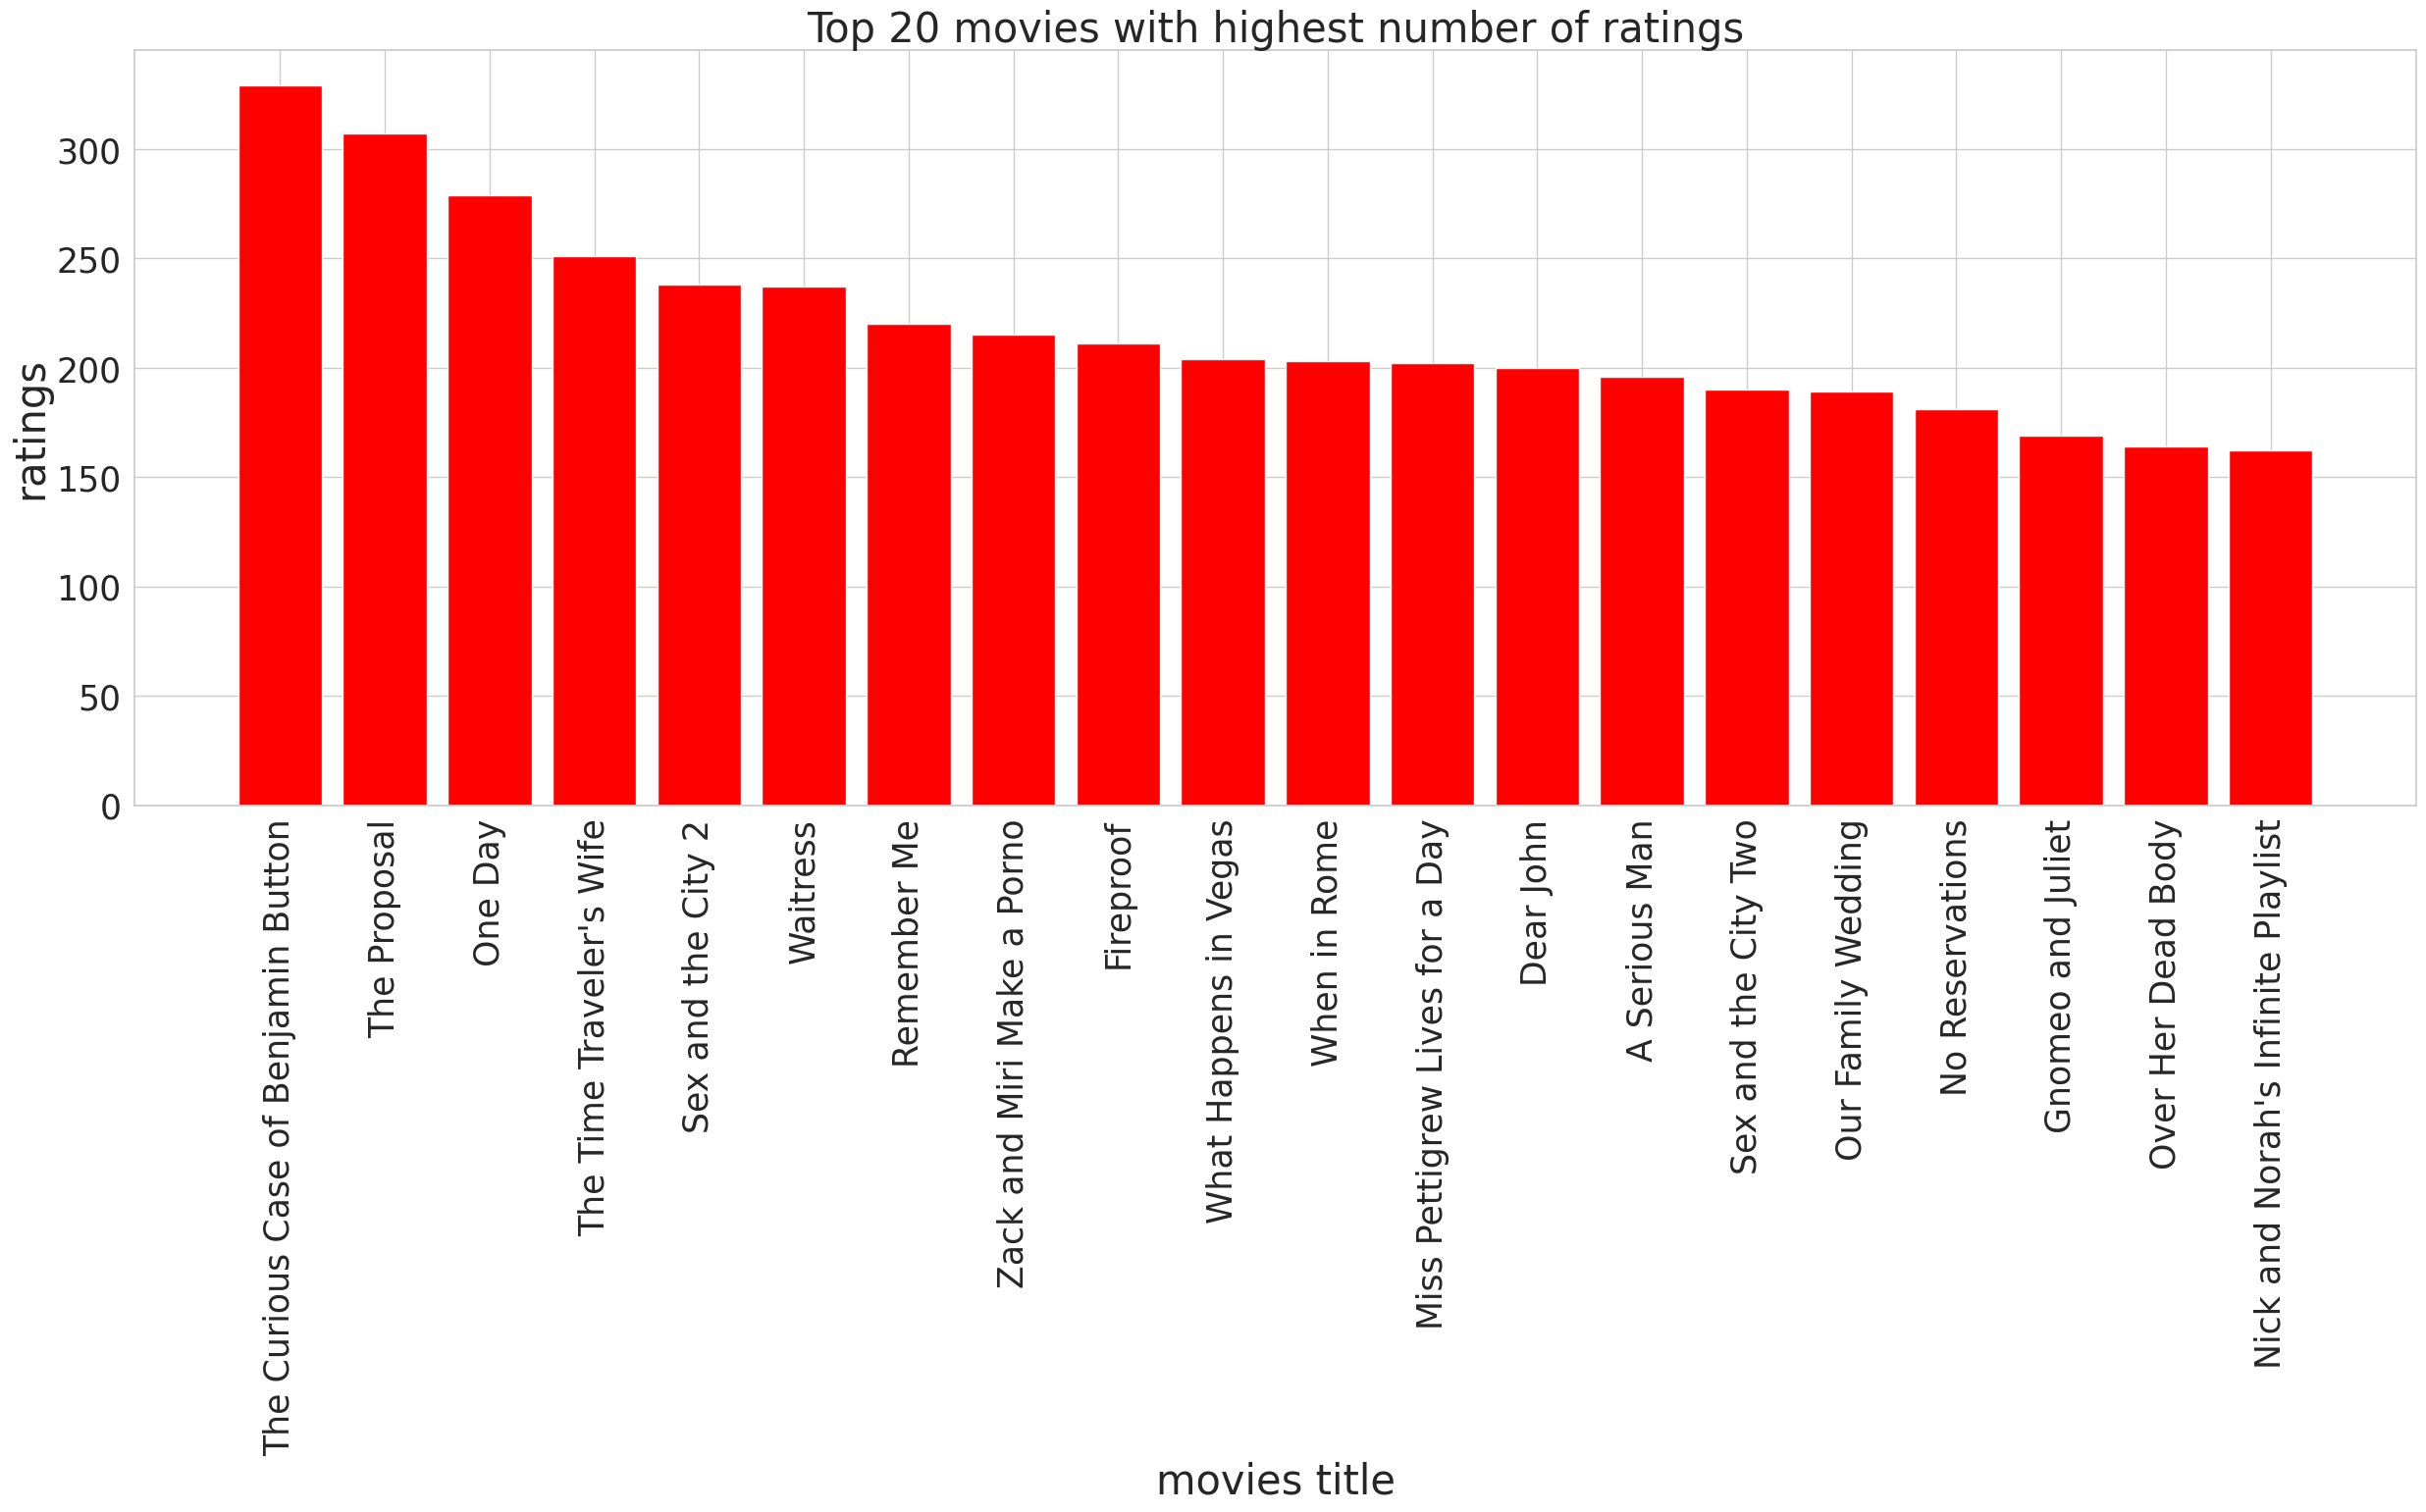

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('ratings',fontsize=30)

plt.bar(rating_count_20.index,rating_count_20.rating,color='red')

In [ ]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['Genre'])


In [ ]:
movie_user = df.pivot_table(index='userId',columns='Film',values='rating')
movie_user.head()


Film,(500) Days of Summer,27 Dresses,A Dangerous Method,A Serious Man,Across the Universe,Beginners,Dear John,Enchanted,Fireproof,Four Christmases,...,Valentine's Day,WALL-E,Waiting For Forever,Waitress,Water For Elephants,What Happens in Vegas,When in Rome,You Will Meet a Tall Dark Stranger,Youth in Revolt,Zack and Miri Make a Porno
userId,,,,,,,,,,,,,,,,,,,,,
1,2.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,4.0,NaN,NaN,NaN,3.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,4.0


In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices=pd.Series(movies.index,index=movies['Film'])
titles=movies['Film']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]


In [ ]:
recommendations('The Proposal')

2     You Will Meet a Tall Dark Stranger
3                           When in Rome
4                  What Happens in Vegas
9                        Valentine's Day
13                        The Ugly Truth
16                          The Proposal
17                The Invention of Lying
18                    The Heartbreak Kid
21                      The Back-up Plan
24                She's Out of My League
25                  Sex and the City Two
26                    Sex and the City 2
27                      Sex and the City
30                              Penelope
32                    Over Her Dead Body
33                    Our Family Wedding
36                       No Reservations
37    Nick and Norah's Infinite Playlist
42        Miss Pettigrew Lives for a Day
44                         Marley and Me
Name: Film, dtype: object